In [38]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

### Import Pokemon Dataset

In [40]:
df_p = pd.read_csv("pokemon.csv")
df_p[:3]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### Data Information

In [41]:
# Data Info
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [42]:
# Statistics of Numerical Features
df_p.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [43]:
# Statistics of Categorical Features
df_p.describe(exclude = "number")

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Deino,Water,Flying,False
freq,1,112,97,735


In [44]:
# Delete unnecessary columns and the columns which have low standard deviation
df_p = df_p[df_p.columns.drop(["#", "Legendary", "Generation"])]
df_p[:3]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80


### Visually detecting redundant features

In [45]:
female = pd.read_csv("Ansur_Female.csv")
male = pd.read_csv("Ansur_Male.csv")
ansur_df = pd.concat([female, male])
ansur_df[:3]

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall


In [46]:
# Combine Similiar Features
ansur_df["body_height"] = ansur_df["stature_m"]
ansur_df["n_legs"] = 2

### Pairplot

In [47]:
# Select Specific Features
ansur_df1 = ansur_df[["Gender", "weight_kg", "stature_m", "body_height"]]
ansur_df1[:3]

,Gender,weight_kg,stature_m,body_height
0,Female,65.7,1.560,1.560
1,Female,53.4,1.665,1.665
2,Female,66.3,1.711,1.711


<Figure size 1296x504 with 0 Axes>

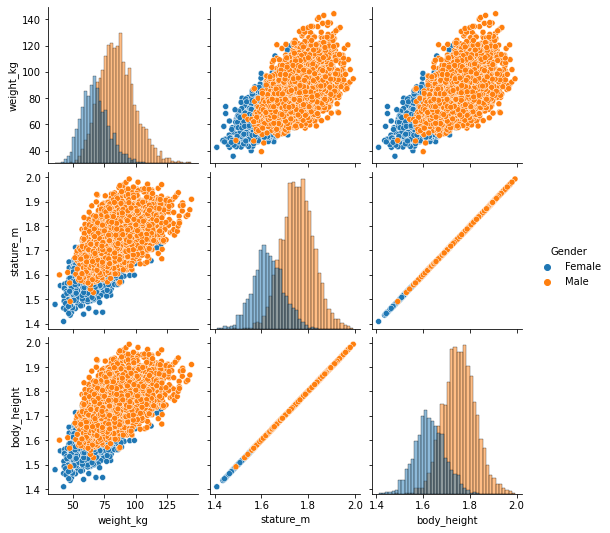

In [48]:
# Create a pairplot and color the points using the 'Gender' feature
plt.figure(figsize = (18, 7))
sns.pairplot(ansur_df1, hue='Gender', diag_kind='hist', palette = "tab10")
plt.show()

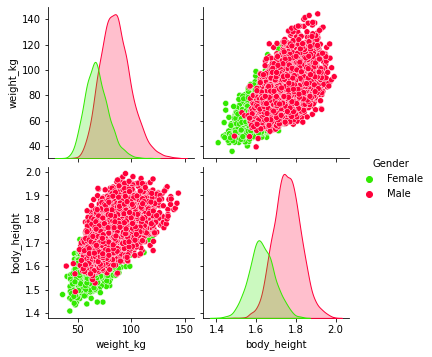

In [49]:
# Remove one of the redundant features
reduced_df = ansur_df1.drop("stature_m", axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', palette = "prism")
plt.show()

In [50]:
# Select Specific Features
ansur_df2 = ansur_df[['Gender', 'footlength', 'headlength', 'n_legs']]
ansur_df2[:3]

,Gender,footlength,headlength,n_legs
0,Female,246,191,2
1,Female,249,180,2
2,Female,265,207,2


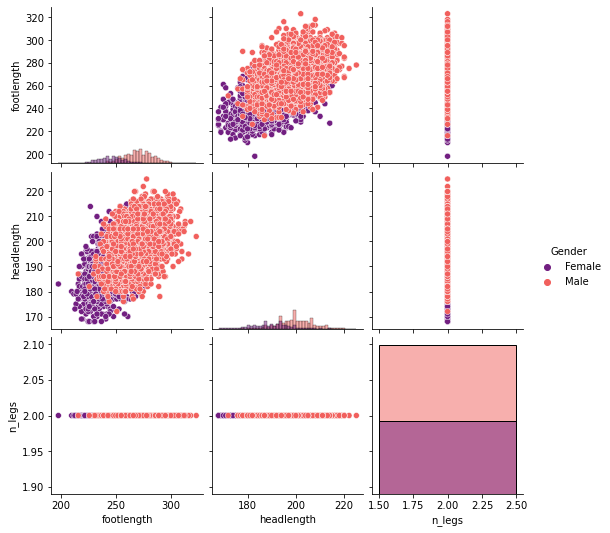

In [51]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df2, hue='Gender', diag_kind='hist', palette = "magma")

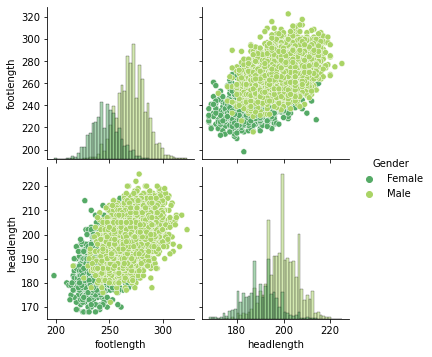

In [53]:
# Remove the redundant feature
reduced_df = ansur_df2.drop('n_legs', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist', palette = "summer")

### Fitting t-SNE to the ANSUR data

In [55]:
# Non-numerical columns in the dataset
non_numeric = ["BMI_class", "Height_class", "Gender", "Component", "Branch"]

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis = 1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
tsne_features[:3]

array([[-46.107285 , -19.719791 ],
       [-35.011086 ,   6.1518   ],
       [-23.781183 ,  -4.5340137]], dtype=float32)

In [56]:
tsne = pd.DataFrame(tsne_features , columns = ["x", "y"])
df = ansur_df.join(tsne)
df[:3]

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class,body_height,n_legs,x,y
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,756,65.7,1.560,26.997041,Overweight,Normal,1.560,2,-46.107285,-19.719791
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,853,81.5,1.776,25.838761,Overweight,Tall,1.776,2,-46.107285,-19.719791
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,815,53.4,1.665,19.262506,Normal,Normal,1.665,2,-35.011086,6.151800


### Color the points according to Army Component

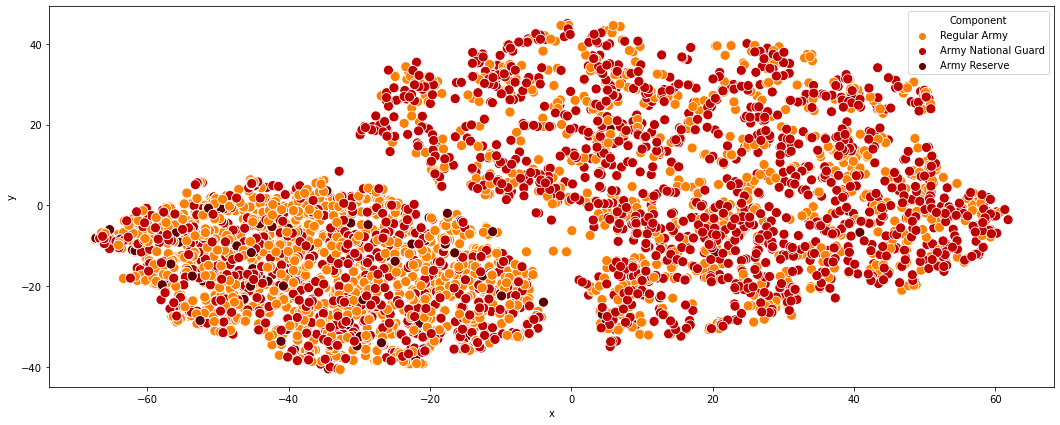

In [67]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x="x", y="y", hue='Component', data=df, palette = "gist_heat_r", s = 100)
plt.show()

### Color the points by Army Branch

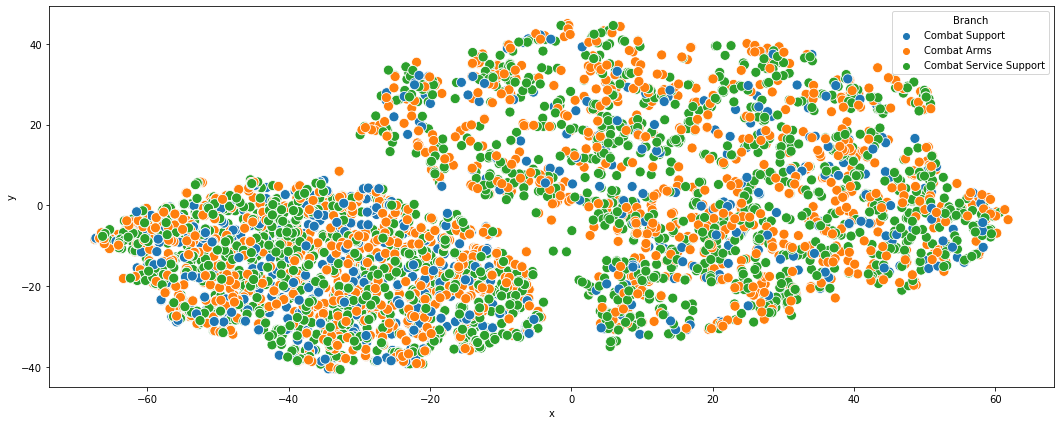

In [69]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x="x", y="y", hue='Branch', data=df, s = 100)
plt.show()

### Color the points by Gender

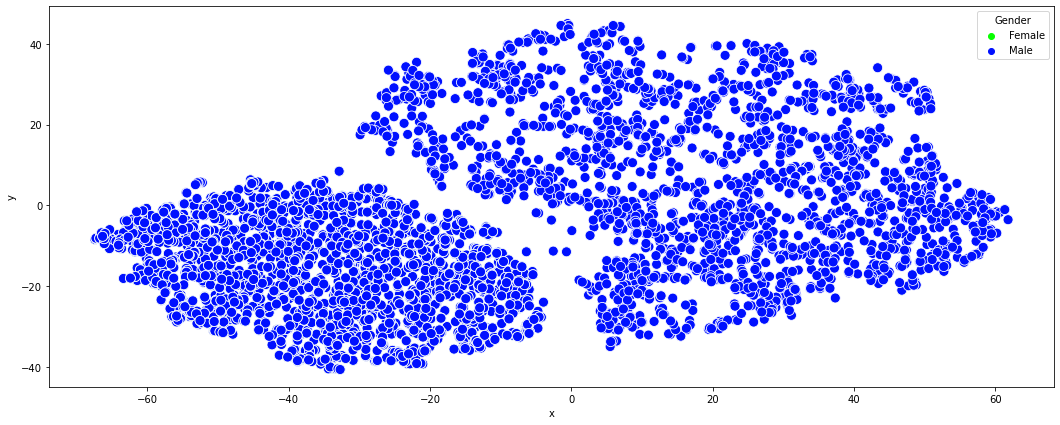

In [78]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x="x", y="y", hue='Gender', data=df, palette = "hsv", s= 100)
plt.show()